In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_20231017_0402pm.csv')
#columns_to_drop = ['Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34']
#data = data.drop(columns=columns_to_drop)

data.head()

,part_date,cdr_og_netone_call_cnt,cdr_og_netone_call_mins,tariff_rate,termination_rate,rtgs_interbank_exchange,tarriff_usd,weekend_flag,week_of_month,week_of_year,...,yest_usage_cnt_,day_bf_yest_usage,day_bf_yestusage_,1_day_users_cnt,2_day_users_cnt,3_day_users_cnt,4_day_users_cnt,5_day_users_cnt,6_day_users_cnt,7_day_users_cnt
0,01-10-2021,1701336,1492856,2.8083,0.2,175,0.016047,0,1,40,...,0,0,0,1219314,611315,342841,200553,118488,68801,36642
1,02-10-2021,1696106,1467425,2.8083,0.2,175,0.016047,1,1,40,...,25431,0,0,1227607,616447,343215,201387,118773,68384,36131
2,03-10-2021,1453001,1285924,2.8083,0.2,175,0.016047,1,1,40,...,181501,1492856,206932,1223624,618003,342855,200535,117385,67357,35634
3,04-10-2021,1640321,1468526,2.8083,0.2,175,0.016047,0,2,41,...,-182602,1467425,-1101,1226669,617820,343340,199990,116458,66891,35421
4,05-10-2021,1634891,1458419,2.8083,0.2,175,0.016047,0,2,41,...,10107,1285924,-172495,1230220,619522,343943,199486,117185,66480,35348


In [18]:
data.nunique()

part_date                  723
cdr_og_netone_call_cnt     723
cdr_og_netone_call_mins    723
tariff_rate                  6
termination_rate             3
rtgs_interbank_exchange     58
tarriff_usd                 62
weekend_flag                 2
week_of_month                6
week_of_year                53
unq_cust                   721
mean_holding_time          723
yest_cust_cnt              721
yest_cust_cnt_             721
day_bf_cnt_                720
day_bf_yest_cnt            721
yest_usage_cnt             723
yest_usage_cnt_            720
day_bf_yest_usage          722
day_bf_yestusage_          721
1_day_users_cnt            723
2_day_users_cnt            721
3_day_users_cnt            722
4_day_users_cnt            719
5_day_users_cnt            720
6_day_users_cnt            719
7_day_users_cnt            691
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   part_date                723 non-null    object 
 1   cdr_og_netone_call_cnt   723 non-null    int64  
 2   cdr_og_netone_call_mins  723 non-null    int64  
 3   tariff_rate              723 non-null    float64
 4   termination_rate         723 non-null    float64
 5   rtgs_interbank_exchange  723 non-null    int64  
 6   tarriff_usd              723 non-null    float64
 7   weekend_flag             723 non-null    int64  
 8   week_of_month            723 non-null    int64  
 9   week_of_year             723 non-null    int64  
 10  unq_cust                 723 non-null    int64  
 11  mean_holding_time        723 non-null    float64
 12  yest_cust_cnt            723 non-null    int64  
 13  yest_cust_cnt_           723 non-null    int64  
 14  day_bf_cnt_              7

In [23]:
data.columns

Index(['part_date', 'cdr_og_netone_call_cnt', 'cdr_og_netone_call_mins',
       'tariff_rate', 'termination_rate', 'rtgs_interbank_exchange',
       'tarriff_usd', 'weekend_flag', 'week_of_month', 'week_of_year',
       'unq_cust', 'mean_holding_time', 'yest_cust_cnt', 'yest_cust_cnt_',
       'day_bf_cnt_', 'day_bf_yest_cnt', 'yest_usage_cnt', 'yest_usage_cnt_',
       'day_bf_yest_usage', 'day_bf_yestusage_', '1_day_users_cnt',
       '2_day_users_cnt', '3_day_users_cnt', '4_day_users_cnt',
       '5_day_users_cnt', '6_day_users_cnt', '7_day_users_cnt'],
      dtype='object')

In [9]:
# List of columns to keep
columns_to_keep = [
   'part_date',
'cdr_og_netone_call_mins',
'termination_rate',
'rtgs_interbank_exchange',
'tarriff_usd',
'weekend_flag',
'week_of_month',
'week_of_year',
#'unq_cust',
#'mean_holding_time',
'yest_cust_cnt_',
'day_bf_yest_cnt',
'1_day_users_cnt',
'2_day_users_cnt',
'3_day_users_cnt',
'4_day_users_cnt',
'5_day_users_cnt',
'6_day_users_cnt',
'7_day_users_cnt'
#'yest_usage_cnt_',
#'day_bf_yestusage_'
]

# Drop columns not in the list
data = data[columns_to_keep]

# Now, 'df' contains only the columns you specified in 'columns_to_keep'
data.columns

Index(['part_date', 'cdr_og_netone_call_mins', 'termination_rate',
       'rtgs_interbank_exchange', 'tarriff_usd', 'weekend_flag',
       'week_of_month', 'week_of_year', 'yest_cust_cnt_', 'day_bf_yest_cnt',
       '1_day_users_cnt', '2_day_users_cnt', '3_day_users_cnt',
       '4_day_users_cnt', '5_day_users_cnt', '6_day_users_cnt',
       '7_day_users_cnt'],
      dtype='object')

In [10]:
data.columns=["Date","usage_mins","termination_rate","rtgs_rate","tarriff_usd","weekend_flag","week_of_month","week_of_year","yest_cust_cnt","dbfy_cust_cnt",'1_day_users_cnt',
              '2_day_users_cnt', '3_day_users_cnt', '4_day_users_cnt',
           '5_day_users_cnt', '6_day_users_cnt', '7_day_users_cnt']
data.head()











,Date,usage_mins,termination_rate,rtgs_rate,tarriff_usd,weekend_flag,week_of_month,week_of_year,yest_cust_cnt,dbfy_cust_cnt,1_day_users_cnt,2_day_users_cnt,3_day_users_cnt,4_day_users_cnt,5_day_users_cnt,6_day_users_cnt,7_day_users_cnt
0,01-10-2021,1492856,0.2,175,0.016047,0,1,40,0,0,1219314,611315,342841,200553,118488,68801,36642
1,02-10-2021,1467425,0.2,175,0.016047,1,1,40,4572,0,1227607,616447,343215,201387,118773,68384,36131
2,03-10-2021,1285924,0.2,175,0.016047,1,1,40,89925,94497,1223624,618003,342855,200535,117385,67357,35634
3,04-10-2021,1468526,0.2,175,0.016047,0,2,41,-70627,19298,1226669,617820,343340,199990,116458,66891,35421
4,05-10-2021,1458419,0.2,175,0.016047,0,2,41,-3216,-73843,1230220,619522,343943,199486,117185,66480,35348


In [11]:
# Convert 'part_date' to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract 'month' and 'year' into separate columns
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data.set_index('Date', inplace=True)
# Display the result
print(data.head())

            usage_mins  termination_rate  rtgs_rate  tarriff_usd  \
Date                                                               
2021-10-01     1492856               0.2        175     0.016047   
2021-10-02     1467425               0.2        175     0.016047   
2021-10-03     1285924               0.2        175     0.016047   
2021-10-04     1468526               0.2        175     0.016047   
2021-10-05     1458419               0.2        175     0.016047   

            weekend_flag  week_of_month  week_of_year  yest_cust_cnt  \
Date                                                                   
2021-10-01             0              1            40              0   
2021-10-02             1              1            40           4572   
2021-10-03             1              1            40          89925   
2021-10-04             0              2            41         -70627   
2021-10-05             0              2            41          -3216   

            dbfy_c

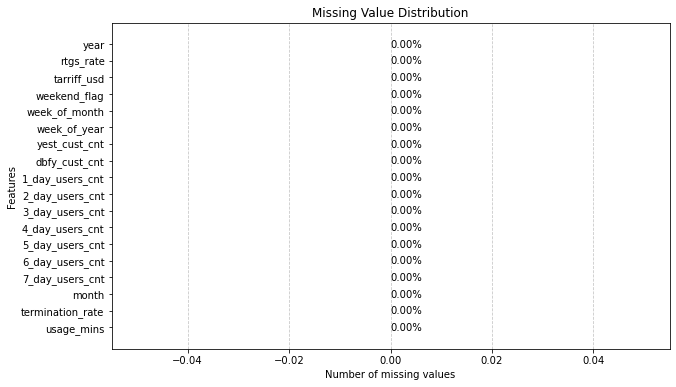

,feature,num_missing,pct_missing,group
usage_mins,usage_mins,0,0.0,Good
termination_rate,termination_rate,0,0.0,Good
month,month,0,0.0,Good
7_day_users_cnt,7_day_users_cnt,0,0.0,Good
6_day_users_cnt,6_day_users_cnt,0,0.0,Good
5_day_users_cnt,5_day_users_cnt,0,0.0,Good
4_day_users_cnt,4_day_users_cnt,0,0.0,Good
3_day_users_cnt,3_day_users_cnt,0,0.0,Good
2_day_users_cnt,2_day_users_cnt,0,0.0,Good
1_day_users_cnt,1_day_users_cnt,0,0.0,Good


In [12]:
# missing values detection
import pandas as pd
import matplotlib.pyplot as plt

def plot_missing(data, title=None):
    # Calculate the number of missing values for each column
    num_missing = data.isna().sum()
    
    # Calculate the percentage of missing values for each column
    pct_missing = (num_missing / len(data)) * 100
    
    # Categorize columns into 'Good,' 'OK,' 'Bad,' or 'Remove'
    group = pd.cut(pct_missing, bins=[-1, 5, 40, 80, 100], labels=['Good', 'OK', 'Bad', 'Remove'])
    
    # Create a DataFrame to store the results
    missing_value = pd.DataFrame({
        'feature': num_missing.index,
        'num_missing': num_missing,
        'pct_missing': pct_missing,
        'group': group
    })
    
    # Sort the DataFrame by the percentage of missing values
    missing_value = missing_value.sort_values(by='pct_missing', ascending=False)
    
    # Create the missing value plot
    plt.figure(figsize=(10, 6))
    plt.barh(missing_value['feature'], missing_value['num_missing'], color=missing_value['group'].map({
        'Good': '#1a9641',
        'OK': '#a6d96a',
        'Bad': '#fdae61',
        'Remove': '#d7191c'
    }))
    plt.xlabel('Number of missing values')
    plt.ylabel('Features')
    plt.title(title if title else 'Missing Value Distribution')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add percentage labels
    for i, v in enumerate(missing_value['pct_missing']):
        plt.text(v, i, f'{v:.2f}%', va='center', color='black')
    
    plt.show()
    
    return missing_value

# Assuming 'train' is your DataFrame
plot_missing(data)


Best Model: Gradient Boosting


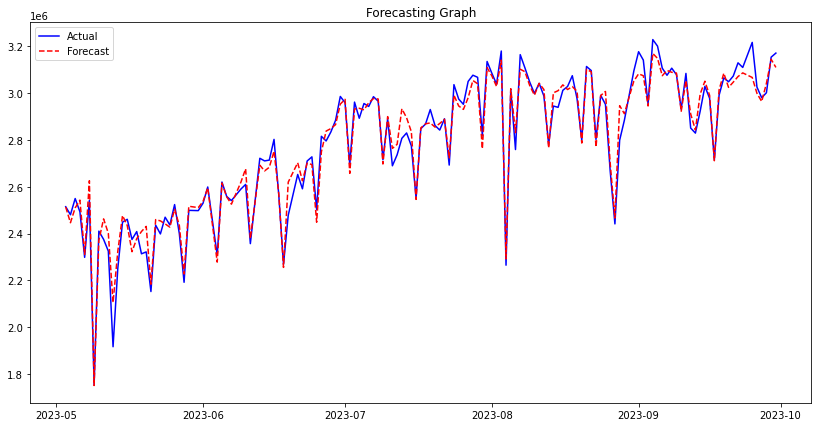

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values. You can use imputation methods, but for simplicity, we'll drop them here.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is now in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Increased iterations for convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Use the best model for predictions
# Assuming your future data is the same as X_test for demonstration purposes.
predictions = best_model.predict(X_test)

# Store predictions in a variable
forecasted_values = predictions

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, forecasted_values, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph')
plt.legend()
plt.show()


<AxesSubplot:>

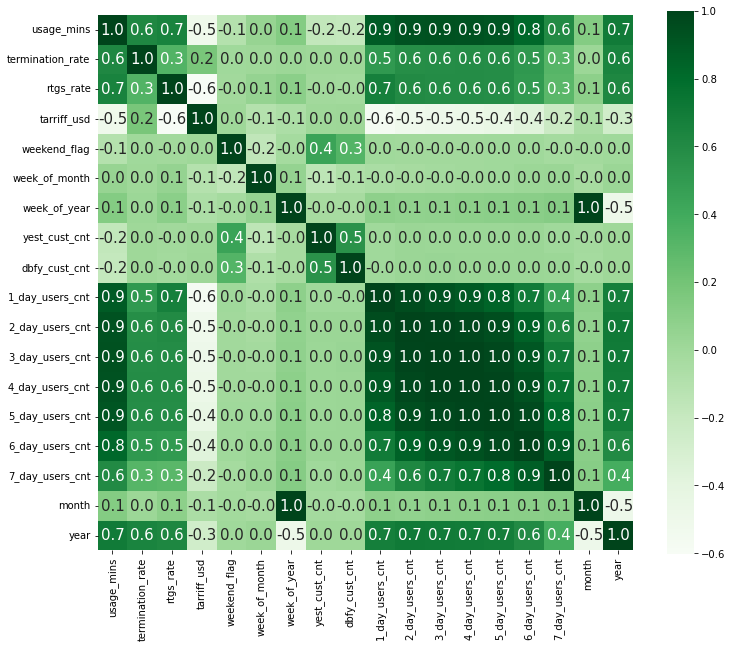

In [14]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

R-squared Scores:
               Model  R-squared Score
3  Gradient Boosting         0.622279
4            XGBoost         0.513332
2      Random Forest         0.487180
1      Decision Tree         0.115912
0  Linear Regression        -0.540948
5      SVM Regressor        -3.368615

Adjusted R-squared Scores:
               Model  Adjusted R-squared Score
3  Gradient Boosting                  0.571718
4            XGBoost                  0.448187
2      Random Forest                  0.418535
1      Decision Tree                 -0.002431
0  Linear Regression                 -0.747216
5      SVM Regressor                 -3.953390

Best Model based on Adjusted R-squared Score: Gradient Boosting



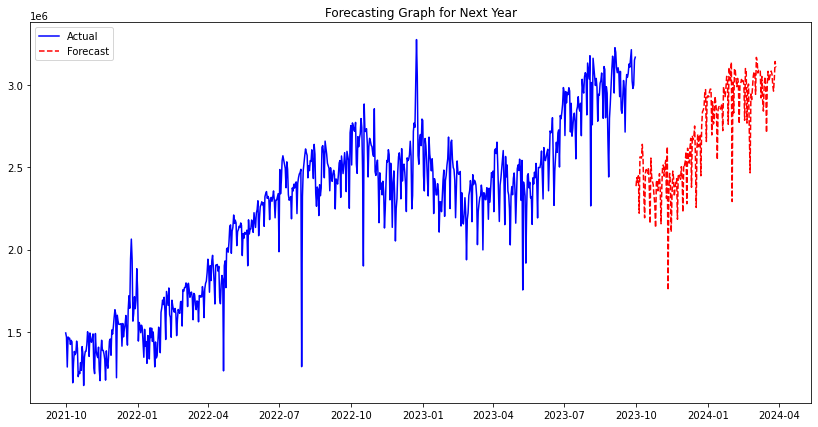

Top 15 Most Important Features:
            Feature  Importance
1         rtgs_rate    0.744045
12  5_day_users_cnt    0.063028
13  6_day_users_cnt    0.049519
7     dbfy_cust_cnt    0.034972
9   2_day_users_cnt    0.026710
11  4_day_users_cnt    0.026436
6     yest_cust_cnt    0.017518
10  3_day_users_cnt    0.013390
14  7_day_users_cnt    0.008629
2       tarriff_usd    0.006046
5      week_of_year    0.005779
8   1_day_users_cnt    0.002296
15            month    0.001189
4     week_of_month    0.000393
3      weekend_flag    0.000030


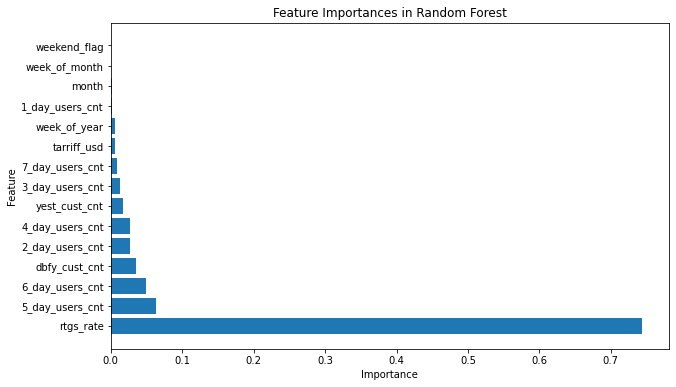

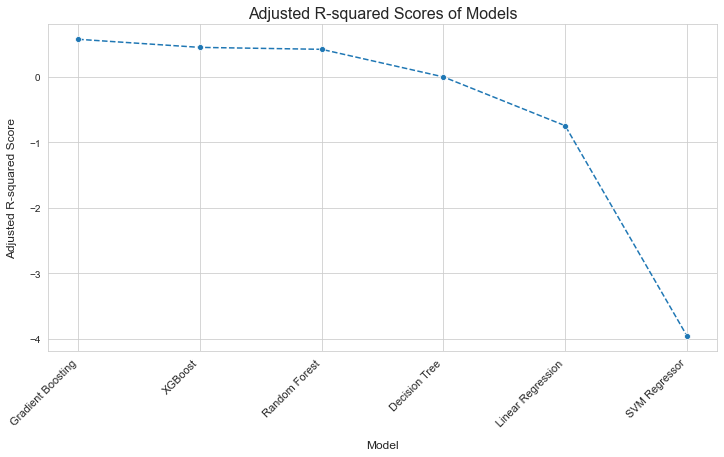

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store R-squared scores and adjusted R-squared scores
r_squared_scores = {}
adj_r_squared_scores = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    r_squared_scores[name] = r2
    adj_r_squared_scores[name] = adj_r2
    
    # Store predictions in the 'predictions' dictionary
    predictions[name] = model.predict(X_test)

# Create DataFrames with model names, R-squared, and adjusted R-squared scores
r_squared_df = pd.DataFrame({
    'Model': list(r_squared_scores.keys()),
    'R-squared Score': list(r_squared_scores.values())
})

adj_r_squared_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrames by adjusted R-squared score in descending order
r_squared_df = r_squared_df.sort_values(by='R-squared Score', ascending=False)
adj_r_squared_df = adj_r_squared_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrames with R-squared and adjusted R-squared scores
print("R-squared Scores:")
print(r_squared_df)
print("\nAdjusted R-squared Scores:")
print(adj_r_squared_df)

# Model Selection
best_model_name = adj_r_squared_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Create a DataFrame to store the forecasted values
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': next_year_predictions})

# Save the forecasted values to an Excel file
#forecast_df.to_excel('forecast_results_ecotonet_v1test.xlsx', index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Gradient Boosting":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 15  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()

# Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(adj_r_squared_df['Model'])
adj_scores = list(adj_r_squared_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()
